<a href="https://colab.research.google.com/github/vig202204/Data_Analytics_Python_Coffee_shop/blob/Data_quality_chek/Daily_coffee_operations_of_favorite_coffee_shops_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### About Dataset

##### Content

This dataset includes comprehensive statistics regarding transactions at coffee shops. It contains the kind of coffee:
- `bought`,
- `total amount spent`,
- the `payment method` (`cash` or `credit card`).  

The dataset offers comprehensive time based variables, including:
- the `month`,
- the `day`,
- the `precise hour of the day`,
- full `timestamps`,
- in addition to purchase details.  

>💡 These characteristics facilitate the investigation of sales patterns over time as well as client prefrences.

##### Context
For many people, coffee shops have become an integral part of their everyday lives, acting as both gathering places and places to stop for a quick refreshment. Knowing when customers come in, what they want to buy, and how they pay is crucial for operating a successful cafe. Examining sales trends, consumer behavior, and seasonal demand is made possible by this dataset. It can be used to compare payment patterns, find the most popular beverages, identify peak business hours, and examine weekly or monthly revenue trends.
Who is interested in this:  
- Managers of coffee shops,
- business analyst,
- and students working on projects involving time series analysis,
- retail analytics,
- customer behaviour can all profit from this kind of analysis.

##### 1.1. Importing several libraries to complete the next steps of this task:

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


##### 1.2. Reading source data

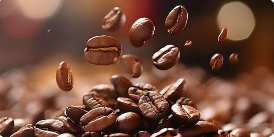

In [47]:
local_or_kagglehub = True # True=local, False=KaggleHub

if local_or_kagglehub:
  import numpy as np
  from google.colab import drive

  # Make connection & mapping Google Drive for local use
  drive.mount("/content/drive")
  %pwd
  # %ls
  %cd /content/drive/MyDrive/MA/G_Colab/Kaggle Datasets/
  %pwd
  # %cd ../
  %ls -AlsF
  # import CSV file
  df_coffee_shop = pd.read_csv("Coffe_sales.csv")
else:
  import kagglehub
  # import CSV file
  df_coffee_shop = pd.read_csv('/kaggle/input/daily-coffee-transactions/Coffe_sales.csv')

print("\nFirst 5 records:\n", df_coffee_shop.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/MA/G_Colab/Kaggle Datasets
total 1244
255 -rw------- 1 root root  260602 Sep 23 06:47  Coffe_sales.csv
990 -rw------- 1 root root 1013001 Oct  8 15:16 'Daily coffee operations of favorite coffee shops_v1.ipynb'

First 5 records:
    hour_of_day cash_type  money    coffee_name Time_of_Day Weekday Month_name  \
0           10      card   38.7          Latte     Morning     Fri        Mar   
1           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
2           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
3           13      card   28.9      Americano   Afternoon     Fri        Mar   
4           13      card   38.7          Latte   Afternoon     Fri        Mar   

   Weekdaysort  Monthsort        Date             Time  
0            5          3  2024-03-01  10:15:50.520000  
1            5   


##### 1.3. Display info about the dataset:

In [48]:
print("\n1.3.1 Displaying first 10 row:\n")
display(df_coffee_shop.head(10))

print("\n1.3.2. Displaying info of Dataframe:\n")
display(df_coffee_shop.info())

print(f"\n1.3.3. Displaying descriptive statistics of Dataframe:\n")
display(df_coffee_shop.describe())

# number of missing values in the columns
print(f"\n1.3.4. Number of missing values in the columns:\n{df_coffee_shop.isna().sum()}")

# share of missing values in columns
print(f"\n1.3.5. Percentage of missing values in columns:\n{df_coffee_shop.isna().sum() / df_coffee_shop.shape[0] * 100}")

# print("\nDisplaying frequency of distinct row in the Dataframe:\n")
# display(df_coffee_shop['Weekdaysort'].value_counts())
# display(df_coffee_shop['Monthsort'].value_counts())



1.3.1 Displaying first 10 row:



,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
5,15,card,33.8,Americano with Milk,Afternoon,Fri,Mar,5,3,2024-03-01,15:39:47.726000
6,16,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,16:19:02.756000
7,18,card,33.8,Americano with Milk,Night,Fri,Mar,5,3,2024-03-01,18:39:03.580000
8,19,card,38.7,Cocoa,Night,Fri,Mar,5,3,2024-03-01,19:22:01.762000
9,19,card,33.8,Americano with Milk,Night,Fri,Mar,5,3,2024-03-01,19:23:15.887000



1.3.2. Displaying info of Dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


None


1.3.3. Displaying descriptive statistics of Dataframe:



,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000



1.3.4. Number of missing values in the columns:
hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64

1.3.5. Percentage of missing values in columns:
hour_of_day    0.0
cash_type      0.0
money          0.0
coffee_name    0.0
Time_of_Day    0.0
Weekday        0.0
Month_name     0.0
Weekdaysort    0.0
Monthsort      0.0
Date           0.0
Time           0.0
dtype: float64


###### Preliminary conclusions on data quality:
  - the dataset contains `3547` entries;
  - `Non-Null` count is `3547`;
  - name of columns need convert to `snake_case`;
  - columns `Date` and `Time` are of type `object`. Their type will need to be converted to `datetime` for time series analysis;
  - all other columns have a valid data type (float64, int64, object) for subsequent analysis.

###### 1.3.1 Converting column names to `snake_case`:

In [49]:
print("Creating clon source Dataframe  - `df_coffee_shop_cleaned`")
df_coffee_shop_cleaned = df_coffee_shop.copy()

df_coffee_shop_cleaned.columns = df_coffee_shop.columns.str.lower().str.replace(" ", "_")
df_coffee_shop_cleaned.info()
df_coffee_shop_cleaned.head()


Creating clon source Dataframe  - `df_coffee_shop_cleaned`
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   time_of_day  3547 non-null   object 
 5   weekday      3547 non-null   object 
 6   month_name   3547 non-null   object 
 7   weekdaysort  3547 non-null   int64  
 8   monthsort    3547 non-null   int64  
 9   date         3547 non-null   object 
 10  time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


,hour_of_day,cash_type,money,coffee_name,time_of_day,weekday,month_name,weekdaysort,monthsort,date,time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


###### 1.3.2. Convert column names to style `snake_case`.

In [50]:
destination_data_column = 'data_time'
# date_column = 'order_date'

df_coffee_shop_cleaned[destination_data_column] = df_coffee_shop_cleaned['date'].astype(str) + ' ' + df_coffee_shop_cleaned['time'].astype(str)
